In [1]:
from os import listdir
from os.path import isfile, join
from tqdm.notebook import tqdm

import numpy as np
import torch
import matplotlib.pyplot as plt
from skimage.color import label2rgb

### List all crop-files

In [2]:
path = '../../Auersberg/NewspaperImageSegmentation/cropsBonn'


crop_files = []
i = 0
for f in tqdm(listdir(path)):
    if isfile(join(path, f)):
        crop_files.append(f)
        i += 1
    if i >= 100:
        break

for i in range(10):
    print(crop_files[i])

  0%|          | 0/166665 [00:00<?, ?it/s]

K├╢lnische Zeitung 1866.06-1866.09 - 0239_732.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0198_74.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0350_418.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0287_407.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0443_529.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0130_934.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0138_1117.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0391_976.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0384_643.pt
K├╢lnische Zeitung 1866.06-1866.09 - 0213_517.pt


In [10]:
images = []
targets = []
for f in tqdm(crop_files):
    crop = torch.load(path + '/' + f)
    images.append(crop[:3])
    targets.append(crop[3])

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
cmap = [(1.0, 0.0, 0.16), (1.0, 0.43843843843843844, 0.0), (0, 0.222, 0.222), (0.36036036036036045, 0.5, 0.5), (0.0, 1.0, 0.2389486260454002), (0.8363201911589008, 1.0, 0.0), (0.0, 0.5615942028985507, 1.0), (0.0422705314009658, 0.0, 1.0), (0.6461352657004831, 0.0, 1.0), (1.0, 0.0, 0.75)]

In [ ]:
def plot(image, target, name):
    plt.imshow(torch.permute(image, (1, 2, 0)))
    plt.axis('off')
    plt.savefig(f'{name}_image.png')
    
    target = target.numpy()
    dummy = np.zeros(len(target))
    dummy[-10:] = np.arange(10)
    target = np.vstack([target, dummy])
    clr_target = label2rgb(target, bg_label=0, colors=cmap)
    clr_target = clr_target[:-1]
    plt.imshow(clr_target)
    plt.axis('off')
    plt.savefig(f'{name}_target.png')


(256, 256)
(257, 256)
(257, 256, 3)
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [1.         0.         0.16      ]
 [1.         0.43843844 0.        ]
 [0.         0.222      0.222     ]
 [0.36036036 0.5        0.5       ]
 [0.         1.         0.23894863]
 [0.83632019 1.         0.        ]
 [0.         0.5615942  1.        ]
 [0.04227053 0.         1.        ]
 [0.64613527 0.         1.        ]]
(256, 256, 3)
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [1.         0.         0.16      ]
 [1.         0.43843844 0.        ]
 [0.         0.222      0.222     ]
 [0.36036036 0.5        0.5       ]
 [0.         1.         0.23894863]
 [0.83632019 1.         0.        ]
 [0.         0.5615942  1.        ]
 [0.04227053 0.         1.        ]
 [0.64613527 0.         1.        ]]


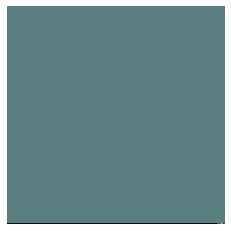

In [33]:
for i, (image, target) in enumerate(zip(images, targets)):
    plot(image, target, f"example_{i}")

### File

In [5]:
from skimage.io import imread
import matplotlib.patches as mpatches


In [6]:
path_image = '../../Auersberg/NewspaperImageSegmentation/DataBonn/1183334/Koelnische_Zeitung_Schulze/K├╢lnische Zeitung 1866.06-1866.09 - 0100.jpg'
path_target = '../../Auersberg/NewspaperImageSegmentation/DataBonn/targets/K├╢lnische Zeitung 1866.06-1866.09 - 0100.npy'

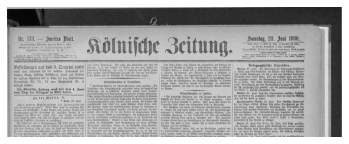

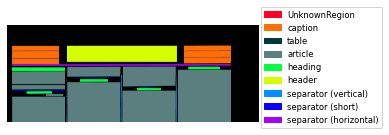

In [28]:
values = ["UnknownRegion", "caption", "table", "article", "heading", "header", "separator (vertical)",
          "separator (short)", "separator (horizontal)"]

# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=cmap[i], label=f"{values[i]}" ) for i in range(9) ]
# put those patched as legend-handles into the legend

image = imread(path_image)[:2000]
target = np.load(path_target)[:2000]

plt.imshow(image)
plt.axis('off')
plt.savefig(f'full_site_image.png', dpi=500)
    
dummy = np.zeros(target.shape[1])
dummy[-10:] = np.arange(10)
target = np.vstack([target, dummy])
clr_target = label2rgb(target, bg_label=0, colors=cmap)
clr_target = clr_target[:-1]

fig, ax = plt.subplots()
plt.imshow(clr_target)
ax.axis('off')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.75, pos.height])
ax.legend(handles=patches, loc=4, fontsize='small', bbox_to_anchor=(1.51, -0.1))
plt.savefig(f'full_site_target.png', dpi=500, pad_inches=2)